In [1]:
# Depth vs Time transition for U, T in Stratification Runs
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import gsw

In [7]:
def UT_prof(datapath, case_id, xidx):
    
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    Grid = xr.open_dataset(datapath + '/grid_' + str(format(case_id,'03d')) + '.nc') 
    grid = Grid.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))

    # Along-fjord velocity
    u0 = state.U.data # dims = T, Z, Y, Xp1
    u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
    #Uzt = u_ymean[:,:,xidx] # U in z, t dimensions
    Uzt = u0[:,:,:,xidx].mean(2)
    
    # Potential temp
    Tzt = state.Temp.data[:,:,:,xidx].mean(2) # Temp in z, t dimensions
    
    depth = state.Z.data
    time = state.T.data / 86400 # Time in days
    
    return depth, time, Uzt, Tzt

In [132]:
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'

caseN = 4
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

depth, time, U1, T1 = UT_prof(path2, caseN, gf)
depth, time, U2, T2 = UT_prof(path2, caseN, sw)
depth, time, U3, T3 = UT_prof(path2, caseN, sc)
depth, time, U4, T4 = UT_prof(path2, caseN, se)

In [105]:
depth

array([  -1.,   -3.,   -5.,   -7.,   -9.,  -11.,  -13.,  -15.,  -17.,
        -19.,  -21.,  -23.,  -25.,  -27.,  -29.,  -31.,  -33.,  -35.,
        -37.,  -39.,  -42.,  -46.,  -50.,  -54.,  -58.,  -62.,  -66.,
        -70.,  -74.,  -78.,  -82.,  -86.,  -90.,  -94.,  -98., -102.,
       -106., -110., -114., -118., -122., -126., -130., -134., -138.,
       -142., -146., -150., -154., -158., -163., -169., -175., -181.,
       -187., -193., -199., -205., -211., -217., -223., -229., -235.,
       -241., -247., -253., -259., -265., -271., -277., -283., -289.,
       -295., -301., -307., -313., -319., -325., -331., -337., -343.,
       -349., -355., -361., -367., -373., -379., -385., -391., -397.])

Text(0.5, 0, 'Time [days]')

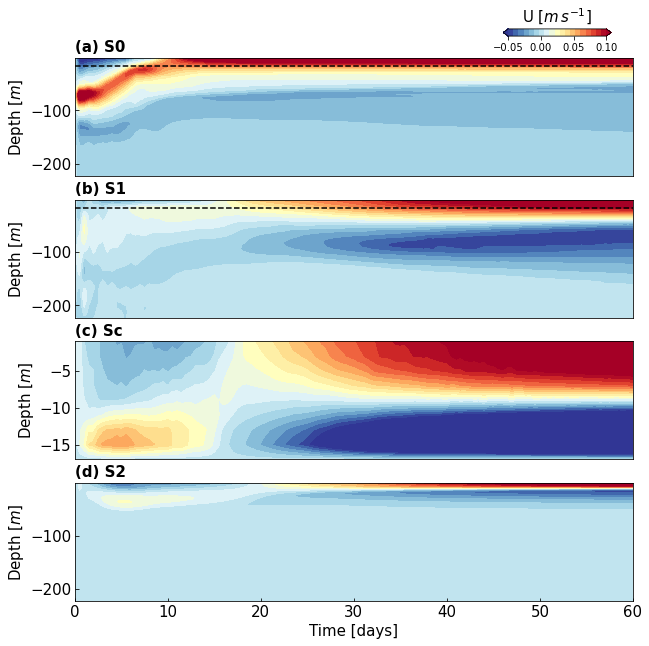

In [133]:
# Making plot for along-fjord velocity U
fig1 = plt.figure(figsize=(10,10))
fig1.tight_layout()  

cu = np.linspace(-0.05,0.1,20) # Contour range for U
cmap = 'RdYlBu_r'


ax1 = fig1.add_subplot(411)
im1 = ax1.contourf(time, depth, U1.T, cu, cmap=cmap, extend='both')
ax1.axhline(y=depth[8],color='k',linestyle='--')

cbaxes = fig1.add_axes([0.72, 0.91, 0.15, 0.01])
cbar = fig1.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([-0.05,0,0.05,0.1])
cbar.ax.set_title('U [$m\,s^{-1}$]', size=15)

ax1.set_xlim(time[0],time[-1])
ax1.set_ylim(depth[60],depth[0])
ax1.xaxis.set_visible(False)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title('(a) S0', loc='left', size=15, weight='bold')
ax1.set_ylabel('Depth [$m$]', size=15)



ax2 = fig1.add_subplot(412)
im2 = ax2.contourf(time, depth, U2.T, cu, cmap=cmap, extend='both')
ax2.axhline(y=depth[8],color='k',linestyle='--')

ax2.set_xlim(time[0],time[-1])
ax2.set_ylim(depth[60],depth[0])
ax2.xaxis.set_visible(False)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
ax2.set_ylabel('Depth [$m$]', size=15)



ax3 = fig1.add_subplot(413)
im3 = ax3.contourf(time, depth, U3.T, cu, cmap=cmap, extend='both')
#ax3.axhline(y=-16,color='k',linestyle='--')

ax3.set_xlim(time[0],time[-1])
ax3.set_ylim(depth[8],depth[0])
ax3.xaxis.set_visible(False)
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
ax3.set_ylabel('Depth [$m$]', size=15)



ax4 = fig1.add_subplot(414)
im4 = ax4.contourf(time, depth, U4.T, cu, cmap=cmap, extend='both')

ax4.set_xlim(time[0],time[-1])
ax4.set_ylim(depth[60],depth[0])
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title('(d) S2', loc='left', size=15, weight='bold')
ax4.set_ylabel('Depth [$m$]', size=15)
ax4.set_xlabel('Time [days]', size=15)

Text(0.5, 0, 'Time [days]')

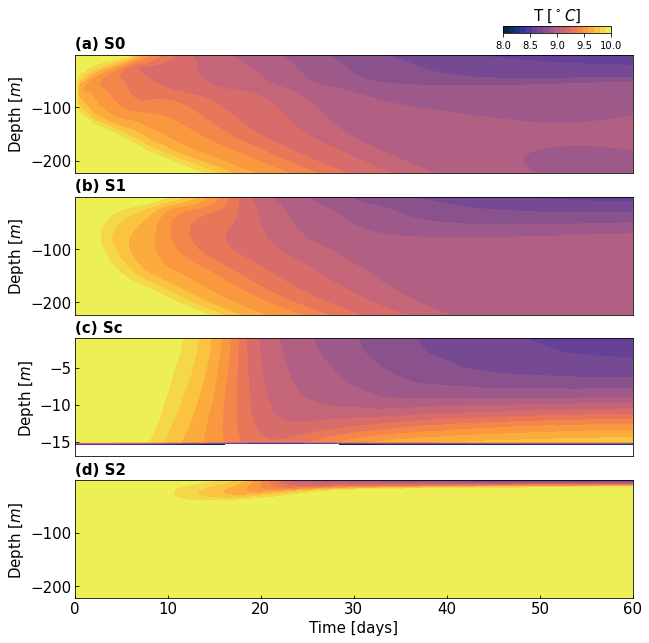

In [134]:
# Making plot for potential temperature
fig2 = plt.figure(figsize=(10,10))
fig2.tight_layout()  

ct = np.linspace(8,10,20) # Contour range for T
#cmap2 = 'YlGnBu_r'
import cmocean
cmap2 = cmocean.cm.thermal

ax1 = fig2.add_subplot(411)
im1 = ax1.contourf(time, depth, T1.T, ct, cmap=cmap2)

cbaxes = fig2.add_axes([0.72, 0.91, 0.15, 0.01])
cbar = fig2.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([8,8.5,9,9.5,10])
cbar.ax.set_title('T [$^\circ C$]', size=15)

ax1.set_xlim(time[0],time[-1])
ax1.set_ylim(depth[60],depth[0])
ax1.xaxis.set_visible(False)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title('(a) S0', loc='left', size=15, weight='bold')
ax1.set_ylabel('Depth [$m$]', size=15)



ax2 = fig2.add_subplot(412)
im2 = ax2.contourf(time, depth, T2.T, ct, cmap=cmap2)

ax2.set_xlim(time[0],time[-1])
ax2.set_ylim(depth[60],depth[0])
ax2.xaxis.set_visible(False)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
ax2.set_ylabel('Depth [$m$]', size=15)



ax3 = fig2.add_subplot(413)
im3 = ax3.contourf(time, depth, T3.T, ct, cmap=cmap2)
#ax3.axhline(y=-16,color='k',linestyle='--')

ax3.set_xlim(time[0],time[-1])
ax3.set_ylim(depth[8],depth[0])
ax3.xaxis.set_visible(False)
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
ax3.set_ylabel('Depth [$m$]', size=15)



ax4 = fig2.add_subplot(414)
im4 = ax4.contourf(time, depth, T4.T, ct, cmap=cmap2)

ax4.set_xlim(time[0],time[-1])
ax4.set_ylim(depth[60],depth[0])
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title('(d) S2', loc='left', size=15, weight='bold')
ax4.set_ylabel('Depth [$m$]', size=15)
ax4.set_xlabel('Time [days]', size=15)

In [135]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig1.savefig(fig_path + '/1LiSz-minhs_Utime.png', dpi=300, bbox_inches='tight')
fig2.savefig(fig_path + '/1LiSz-minhs_Ttime.png', dpi=300, bbox_inches='tight') 